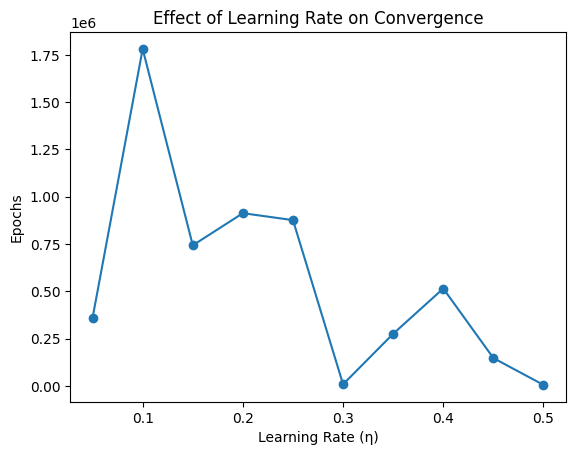

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(57)

# need a sigmoid as well as its derivation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# have a function for training the perceptron model so it can be run multiple times
def train_perceptron(input_patterns, desired_outputs, learning_rate, momentum):
    # Initialize weights and biases using given values
    input_units = 4
    hidden_units = 4
    output_units = 1

    # Weights and biases for the first layer (input to hidden)
    # they need to be random values between -1 and 1 as told in description
    weights_input_hidden = 2 * np.random.rand(input_units, hidden_units) - 1
    bias_hidden = 2 * np.random.rand(1, hidden_units) - 1

    # Weights and biases for the second layer (hidden to output)
    weights_hidden_output = 2 * np.random.rand(hidden_units, output_units) - 1
    bias_output = 2 * np.random.rand(1, output_units) - 1

    # Error rate initialized to a variable so can be changed for future
    error_threshold = 0.05

    # Training loop
    epoch = 0
    while True:

        # Forward pass
        hidden_input = np.dot(input_patterns, weights_input_hidden) + bias_hidden
        hidden_output = sigmoid(hidden_input)

        output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_input)

        # Check error
        error = desired_outputs.reshape(-1, 1) - predicted_output

        # Need to ensure the error is not exceeding the threshold or else end the loop
        if np.all(np.abs(error) < error_threshold):
            break

        # Backpropagation
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

        # Update weights and biases with momentum
        weights_hidden_output += learning_rate * hidden_output.T.dot(output_delta) + momentum
        bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        weights_input_hidden += learning_rate * input_patterns.T.dot(hidden_delta) + momentum
        bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

        # Increase epoch
        epoch += 1

    return epoch

    # Print the number of epochs for each learning rate
    print(f"For η = {learning_rate}, trained in {epochs} epochs")

# Clear the error history before each call to train_perceptron
error_history = []

# Question 1: Vary learning rate in the given range
learning_rates = np.arange(0.05, 0.55, 0.05)
epochs_for_learning_rates = []

for eta in learning_rates:
    epochs = train_perceptron(input_patterns, desired_outputs, eta, 0)
    epochs_for_learning_rates.append(epochs)

# Plot learning curve for learning rates ranging from 0.5 to 5
plt.plot(learning_rates, epochs_for_learning_rates, marker='o')
plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Learning Rate (η)')
plt.ylabel('Epochs')
plt.show()


# Question 2: Include a momentum term
momentum = 0.9
learning_rate = 0.05


epochs_with_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, momentum)
epochs_without_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, 0)

print(f'Epochs with Momentum (η={learning_rate}, β={momentum}): {epochs_with_momentum}')
print(f'Epochs without Momentum (η={learning_rate}): {epochs_without_momentum}')

learning_rate = 0.1

epochs_with_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, momentum)
epochs_without_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, 0)

print(f'Epochs with Momentum (η={learning_rate}, β={momentum}): {epochs_with_momentum}')
print(f'Epochs without Momentum (η={learning_rate}): {epochs_without_momentum}')

learning_rate = 0.3

epochs_with_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, momentum)
epochs_without_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, 0)

print(f'Epochs with Momentum (η={learning_rate}, β={momentum}): {epochs_with_momentum}')
print(f'Epochs without Momentum (η={learning_rate}): {epochs_without_momentum}')

learning_rate = 0.5

epochs_with_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, momentum)
epochs_without_momentum = train_perceptron(input_patterns, desired_outputs, learning_rate, 0)

print(f'Epochs with Momentum (η={learning_rate}, β={momentum}): {epochs_with_momentum}')
print(f'Epochs without Momentum (η={learning_rate}): {epochs_without_momentum}')